In [1]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Loading Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Converting to DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]
print("Sample of the Iris dataset:")
df.head()

Sample of the Iris dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preprocessing

In [4]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Converting target to one-hot encoding
y_encoded = to_categorical(y)

In [6]:
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y
)

print("\nShapes after split:")
print(f"Training data: {X_train.shape}, Training labels: {y_train.shape}")
print(f"Test data: {X_test.shape}, Test labels: {y_test.shape}")


Shapes after split:
Training data: (120, 4), Training labels: (120, 3)
Test data: (30, 4), Test labels: (30, 3)


In [7]:
# Building the Neural Network Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Define the model architecture
model = Sequential([
    Dense(8, input_dim=4, activation='relu'),   
    Dense(6, activation='relu'),                
    Dense(3, activation='softmax')             
])

C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Displaying model summary
print("Neural Network Architecture:")
model.summary()

Neural Network Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 115 (460.00 B)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Training the Neural Network Model

import matplotlib.pyplot as plt

history = model.fit(
    X_train, y_train,              
    validation_data=(X_test, y_test), 
    epochs=100,                       
    batch_size=8,                     
    verbose=1                        
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 84s 118ms/step - accuracy: 0.2917 - loss: 1.4237 - val_accuracy: 0.3667 - val_loss: 1.3746
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2750 - loss: 1.3141 - val_accuracy: 0.3000 - val_loss: 1.2796
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2500 - loss: 1.2352 - val_accuracy: 0.2667 - val_loss: 1.2097
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2750 - loss: 1.1726 - val_accuracy: 0.2667 - val_loss: 1.1656
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2583 - loss: 1.1391 - val_accuracy: 0.3000 - val_loss: 1.1352
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2833 - loss: 1.1120 - val_accuracy: 0.2667 - val_loss: 1.1122
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3167 - loss: 1.0897 - val_accuracy: 0.3333 - val_loss: 1.0917
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4167 - loss: 1.0723 - val_accuracy: 0.4667

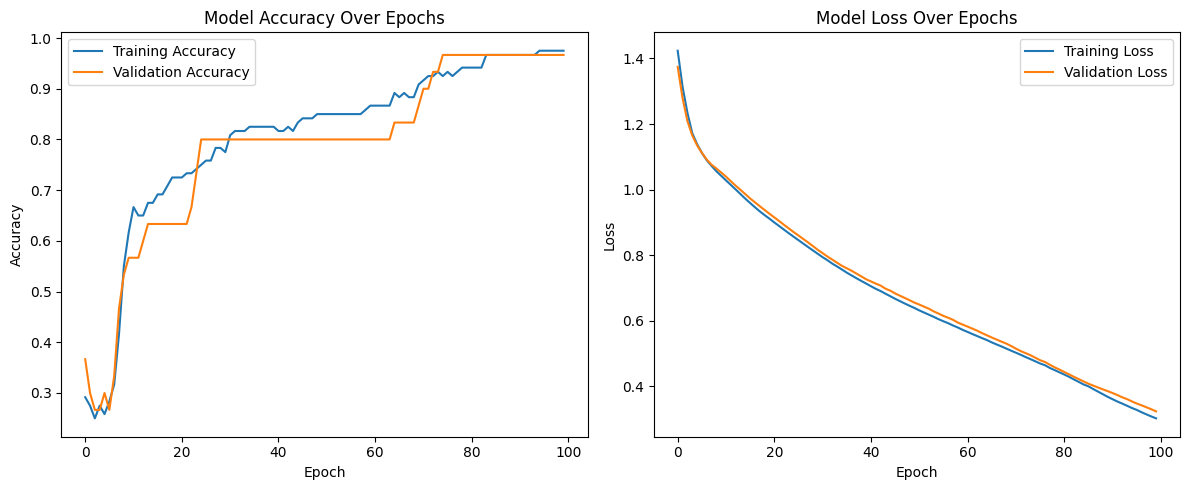

In [11]:
# Plotting accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Evaluating and Interpreting the Model

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9667 - loss: 0.3229
Test Accuracy: 0.9667
Test Loss: 0.3229


In [13]:
# Making predictions
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step


In [14]:
# Converting from one-hot encoding to class labels
y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)


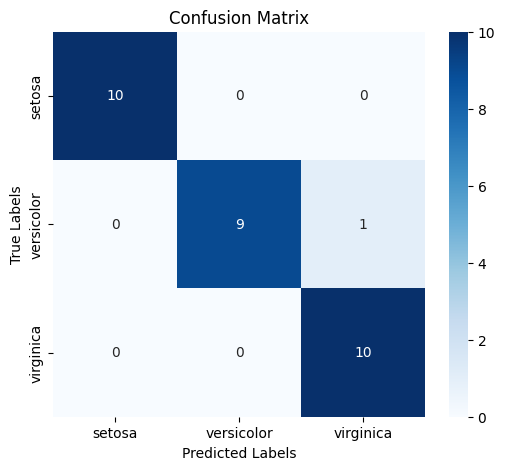

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [16]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=iris.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [17]:
# Model Summary, Saving, and Report

# Step 1: Model Summary
print("Neural Network Architecture Summary:")
model.summary()


Neural Network Architecture Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347 (1.36 KB)

 Trainable params: 115 (460.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 232 (932.00 B)

In [18]:
# Saving the Model
model.save("iris_nn_model.h5")
print("\n✅ Model saved successfully as 'iris_nn_model.h5'")


✅ Model saved successfully as 'iris_nn_model.h5'


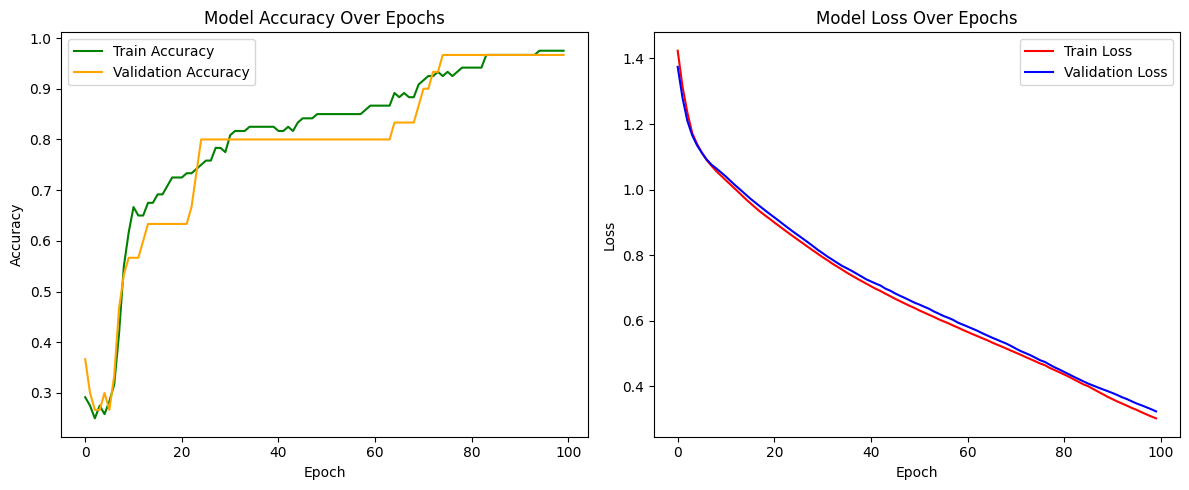


📊 Training plots saved as 'training_plots.png'


In [19]:
# Saving the training history plots
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("training_plots.png") 
plt.show()

print("\n📊 Training plots saved as 'training_plots.png'")

In [20]:
# Hyperparameter Tuning Demo

from tensorflow.keras.optimizers import Adam

In [21]:
def build_and_train_model(neurons_1=10, neurons_2=8, learning_rate=0.01):
    # Building a model with custom hyperparameters
    model_tuned = Sequential([
        Dense(neurons_1, input_shape=(X_train.shape[1],), activation='relu'),
        Dense(neurons_2, activation='relu'),
        Dense(3, activation='softmax')
    ])

    # Compiling with adjustable learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model_tuned.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Training model quietly
    history_tuned = model_tuned.fit(X_train, y_train, epochs=50, batch_size=8,
                                    validation_split=0.2, verbose=0)
    
    # Evaluating model
    loss, acc = model_tuned.evaluate(X_test, y_test, verbose=0)
    return acc, loss

# Try different configurations
configs = [
    (8, 6, 0.01),
    (16, 12, 0.001),
    (32, 16, 0.005)
]

for n1, n2, lr in configs:
    acc, loss = build_and_train_model(n1, n2, lr)
    print(f"Neurons ({n1}, {n2}) | LR={lr:.3f} → Accuracy: {acc:.4f} | Loss: {loss:.4f}")

C:\Users\Awuni Bismark\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neurons (8, 6) | LR=0.010 → Accuracy: 0.9667 | Loss: 0.1246
Neurons (16, 12) | LR=0.001 → Accuracy: 0.9667 | Loss: 0.1677
Neurons (32, 16) | LR=0.005 → Accuracy: 0.9333 | Loss: 0.0874
